In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.utils import to_categorical
import keras
from keras.layers import *
from keras.models import Model,Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import h5py
from matplotlib import pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [2]:
emotion_labels=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]

In [3]:
num_classes=len(emotion_labels)

In [4]:
fer_data=h5py.File('./data.h5','r',driver='core')

In [5]:
fer_x=np.asarray(fer_data['Training_pixel']).reshape(28709,48,48,1)

In [6]:
fer_y=fer_data['Training_label']

In [7]:
X_train=fer_x

In [8]:
X_test_public=np.asarray(fer_data['PublicTest_pixel']).reshape((3589,48,48,1))

In [9]:
X_test_private=np.asarray(fer_data['PrivateTest_pixel']).reshape((3589,48,48,1))

In [10]:
num_train=X_train.shape[0]

In [11]:
num_val_public=X_test_public.shape[0]

In [12]:
num_val_private=X_test_private.shape[0]

In [13]:
print('Training:',X_train.shape)

Training: (28709, 48, 48, 1)


In [14]:
print('PublicTest:',X_test_public.shape)

PublicTest: (3589, 48, 48, 1)


In [15]:
print('PrivateTest:',X_test_private.shape)

PrivateTest: (3589, 48, 48, 1)


In [16]:
Y_train=fer_data['Training_label']

In [17]:
Y_train=to_categorical(Y_train,num_classes)

In [18]:
Y_test_public=fer_data['PublicTest_label']

In [19]:
Y_test_private=fer_data['PrivateTest_label']

In [20]:
Y_test_public=to_categorical(Y_test_public,num_classes)

In [21]:
Y_test_private=to_categorical(Y_test_private,num_classes)

In [22]:
print('Training:',Y_train.shape)

Training: (28709, 7)


In [23]:
print('PublicTest:',Y_test_public.shape)

PublicTest: (3589, 7)


In [24]:
print('PrivateTest:',Y_test_private.shape)

PrivateTest: (3589, 7)


In [25]:
def get_nn_model():
    model=Sequential()
    
    model.add(Flatten(input_shape=(48,48,1)))
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(7))
    model.add(Activation('softmax'))
    return model

In [26]:
from keras.layers import Convolution2D,Activation,BatchNormalization,MaxPooling2D,Dropout,Dense,Flatten,AveragePooling2D

In [27]:
from keras.models import Sequential

In [28]:
def get_cnn_model():
    model=Sequential()
    
    model.add(Convolution2D(64,(3,1),padding='same',input_shape=(48,48,1)))
    model.add(Convolution2D(64,(1,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='same'))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(128,(3,1),padding='same'))
    model.add(Convolution2D(128,(1,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='same'))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(256,(3,1),padding='same'))
    model.add(Convolution2D(256,(1,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='same'))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(512,(3,1),padding='same'))
    model.add(Convolution2D(512,(1,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='same'))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(7))
    model.add(Activation('softmax'))
    return model

In [29]:
cnn_model=get_cnn_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
nn_model=get_nn_model()

In [31]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       24704     
__________

In [32]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1180160   
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
__________

In [33]:
from keras.preprocessing.image import ImageDataGenerator

In [34]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [35]:
from keras import backend as K

In [36]:
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 1

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

In [37]:
def train_cnn_model(model):
    filepath='../opt/fer-cnn/Model.{epoch:02d}-{val_acc:.4f}.hdf5'
    checkpointer=ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=False,mode='auto')
    reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10,verbose=0,mode='auto',cooldown=0,min_lr=0)
    early_stop=EarlyStopping(monitor='val_loss',min_delta=0,patience=0,verbose=0,mode='auto')
    datagen=ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=0,
        width_shift_range=0.0,
        height_shift_range=0.0,
        horizontal_flip=True,
        vertical_flip=False,
    )
    
    datagen.fit(X_train)
    datagen.fit(X_test_public)
    datagen.fit(X_test_private)
    batch_size=32
    
    num_epochs=200
    model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                 metrics=[fbeta,'acc'])
    train_flow=datagen.flow(X_train,Y_train,batch_size=batch_size)
    test_flow_public=datagen.flow(X_test_public,Y_test_public)
    test_flow_private=datagen.flow(X_test_private,Y_test_private)
    #history=cnn_model.fit_generator(train_flow,
     #                              step_per_epoch=len(X_train)/batch_size,
     #                              epochs=num_epochs,
     #                              verbose=1,
     #                              test_data=test_flow,
     #                              test_steps=len(X_test)/batch_size,
     #                              callbacks=[checkpointer,reduce_lr,checkpointer])
    history_public = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=test_flow_public, 
                    validation_steps=len(X_test_public) / batch_size,
                    callbacks=[checkpointer, reduce_lr, checkpointer])
    history_private = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=test_flow_private, 
                    validation_steps=len(X_test_private) / batch_size,
                    callbacks=[checkpointer, reduce_lr, checkpointer])
    return history_public,history_private,model

In [38]:
def train_nn_model(model):
    filepath='../opt/fer-nn/Model.{epoch:02d}-{val_acc:.4f}.hdf5'
    checkpointer=ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=False,mode='auto')
    reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10,verbose=0,mode='auto',cooldown=0,min_lr=0)
    early_stop=EarlyStopping(monitor='val_loss',min_delta=0,patience=0,verbose=0,mode='auto')
    datagen=ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=0,
        width_shift_range=0.0,
        height_shift_range=0.0,
        horizontal_flip=True,
        vertical_flip=False,
    )
    
    datagen.fit(X_train)
    datagen.fit(X_test_public)
    datagen.fit(X_test_private)
    batch_size=32
    
    num_epochs=200
    model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                 metrics=[fbeta,'acc'])
    train_flow=datagen.flow(X_train,Y_train,batch_size=batch_size)
    test_flow_public=datagen.flow(X_test_public,Y_test_public)
    test_flow_private=datagen.flow(X_test_private,Y_test_private)
    #history=cnn_model.fit_generator(train_flow,
     #                              step_per_epoch=len(X_train)/batch_size,
     #                              epochs=num_epochs,
     #                              verbose=1,
     #                              test_data=test_flow,
     #                              test_steps=len(X_test)/batch_size,
     #                              callbacks=[checkpointer,reduce_lr,checkpointer])
    history_public = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=test_flow_public, 
                    validation_steps=len(X_test_public) / batch_size,
                    callbacks=[checkpointer, reduce_lr, checkpointer])
    history_private = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=test_flow_private, 
                    validation_steps=len(X_test_private) / batch_size,
                    callbacks=[checkpointer, reduce_lr, checkpointer])
    return history_public,history_private,model

In [39]:
history_public,history_private,cnn_model = train_cnn_model(cnn_model)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
898/897 [==============================] - 22s 24ms/step - loss: 1.6875 - fbeta: 0.1564 - acc: 0.3559 - val_loss: 1.8029 - val_fbeta: 0.2577 - val_acc: 0.3667

Epoch 00001: saving model to ../opt/fer-cnn/Model.01-0.3667.hdf5

Epoch 00001: saving model to ../opt/fer-cnn/Model.01-0.3667.hdf5
Epoch 2/200
898/897 [==============================] - 19s 21ms/step - loss: 1.3754 - fbeta: 0.2755 - acc: 0.4764 - val_loss: 1.4587 - val_fbeta: 0.3029 - val_acc: 0.4558

Epoch 00002: saving model to ../opt/fer-cnn/Model.02-0.4558.hdf5

Epoch 00002: saving model to ../opt/fer-cnn/Model.02-0.4558.hdf5
Epoch 3/200
898/897 [==============================] - 19s 21ms/step - loss: 1.2676 - fbeta: 0.3170 - acc: 0.5199 - val_loss: 1.4339 - val_fbeta: 0.3040 - val_acc: 0.4483

Epoch 00003: saving model to ../opt/fer-cnn/Model.03-0.4483.hdf5

Epoch 00003: saving model to ../opt/fer-cnn/Model.03-0.4483.hdf5
Epoch 4/200
898/897 [======================

898/897 [==============================] - 19s 21ms/step - loss: 0.7594 - fbeta: 0.6212 - acc: 0.7175 - val_loss: 1.0351 - val_fbeta: 0.5567 - val_acc: 0.6408

Epoch 00027: saving model to ../opt/fer-cnn/Model.27-0.6408.hdf5

Epoch 00027: saving model to ../opt/fer-cnn/Model.27-0.6408.hdf5
Epoch 28/200
898/897 [==============================] - 19s 21ms/step - loss: 0.7460 - fbeta: 0.6290 - acc: 0.7213 - val_loss: 1.0346 - val_fbeta: 0.5464 - val_acc: 0.6330

Epoch 00028: saving model to ../opt/fer-cnn/Model.28-0.6330.hdf5

Epoch 00028: saving model to ../opt/fer-cnn/Model.28-0.6330.hdf5
Epoch 29/200
898/897 [==============================] - 19s 21ms/step - loss: 0.7367 - fbeta: 0.6371 - acc: 0.7268 - val_loss: 1.0314 - val_fbeta: 0.5469 - val_acc: 0.6372

Epoch 00029: saving model to ../opt/fer-cnn/Model.29-0.6372.hdf5

Epoch 00029: saving model to ../opt/fer-cnn/Model.29-0.6372.hdf5
Epoch 30/200
898/897 [==============================] - 18s 21ms/step - loss: 0.7208 - fbeta: 0.6456 

Epoch 54/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4349 - fbeta: 0.8034 - acc: 0.8457 - val_loss: 1.0631 - val_fbeta: 0.6121 - val_acc: 0.6654

Epoch 00054: saving model to ../opt/fer-cnn/Model.54-0.6654.hdf5

Epoch 00054: saving model to ../opt/fer-cnn/Model.54-0.6654.hdf5
Epoch 55/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4367 - fbeta: 0.8014 - acc: 0.8417 - val_loss: 1.0683 - val_fbeta: 0.6099 - val_acc: 0.6645

Epoch 00055: saving model to ../opt/fer-cnn/Model.55-0.6645.hdf5

Epoch 00055: saving model to ../opt/fer-cnn/Model.55-0.6645.hdf5
Epoch 56/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4369 - fbeta: 0.7995 - acc: 0.8401 - val_loss: 1.0683 - val_fbeta: 0.6158 - val_acc: 0.6601

Epoch 00056: saving model to ../opt/fer-cnn/Model.56-0.6601.hdf5

Epoch 00056: saving model to ../opt/fer-cnn/Model.56-0.6601.hdf5
Epoch 57/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4293 - f

Epoch 81/200
898/897 [==============================] - 18s 20ms/step - loss: 0.4297 - fbeta: 0.8034 - acc: 0.8439 - val_loss: 1.0664 - val_fbeta: 0.6102 - val_acc: 0.6617

Epoch 00081: saving model to ../opt/fer-cnn/Model.81-0.6617.hdf5

Epoch 00081: saving model to ../opt/fer-cnn/Model.81-0.6617.hdf5
Epoch 82/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4291 - fbeta: 0.8063 - acc: 0.8463 - val_loss: 1.0615 - val_fbeta: 0.6135 - val_acc: 0.6617

Epoch 00082: saving model to ../opt/fer-cnn/Model.82-0.6617.hdf5

Epoch 00082: saving model to ../opt/fer-cnn/Model.82-0.6617.hdf5
Epoch 83/200
898/897 [==============================] - 18s 20ms/step - loss: 0.4213 - fbeta: 0.8082 - acc: 0.8473 - val_loss: 1.0703 - val_fbeta: 0.6110 - val_acc: 0.6626

Epoch 00083: saving model to ../opt/fer-cnn/Model.83-0.6626.hdf5

Epoch 00083: saving model to ../opt/fer-cnn/Model.83-0.6626.hdf5
Epoch 84/200
898/897 [==============================] - 18s 21ms/step - loss: 0.4305 - f

Epoch 108/200
898/897 [==============================] - 18s 20ms/step - loss: 0.4244 - fbeta: 0.8051 - acc: 0.8464 - val_loss: 1.0593 - val_fbeta: 0.6147 - val_acc: 0.6587

Epoch 00108: saving model to ../opt/fer-cnn/Model.108-0.6587.hdf5

Epoch 00108: saving model to ../opt/fer-cnn/Model.108-0.6587.hdf5
Epoch 109/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4241 - fbeta: 0.8046 - acc: 0.8455 - val_loss: 1.0718 - val_fbeta: 0.6096 - val_acc: 0.6620

Epoch 00109: saving model to ../opt/fer-cnn/Model.109-0.6620.hdf5

Epoch 00109: saving model to ../opt/fer-cnn/Model.109-0.6620.hdf5
Epoch 110/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4316 - fbeta: 0.8052 - acc: 0.8435 - val_loss: 1.0777 - val_fbeta: 0.6144 - val_acc: 0.6634

Epoch 00110: saving model to ../opt/fer-cnn/Model.110-0.6634.hdf5

Epoch 00110: saving model to ../opt/fer-cnn/Model.110-0.6634.hdf5
Epoch 111/200
898/897 [==============================] - 19s 21ms/step - loss: 

Epoch 135/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4193 - fbeta: 0.8060 - acc: 0.8471 - val_loss: 1.0670 - val_fbeta: 0.6183 - val_acc: 0.6676

Epoch 00135: saving model to ../opt/fer-cnn/Model.135-0.6676.hdf5

Epoch 00135: saving model to ../opt/fer-cnn/Model.135-0.6676.hdf5
Epoch 136/200
898/897 [==============================] - 19s 22ms/step - loss: 0.4213 - fbeta: 0.8074 - acc: 0.8479 - val_loss: 1.0709 - val_fbeta: 0.6155 - val_acc: 0.6631

Epoch 00136: saving model to ../opt/fer-cnn/Model.136-0.6631.hdf5

Epoch 00136: saving model to ../opt/fer-cnn/Model.136-0.6631.hdf5
Epoch 137/200
898/897 [==============================] - 19s 22ms/step - loss: 0.4268 - fbeta: 0.8030 - acc: 0.8438 - val_loss: 1.0676 - val_fbeta: 0.6172 - val_acc: 0.6668

Epoch 00137: saving model to ../opt/fer-cnn/Model.137-0.6668.hdf5

Epoch 00137: saving model to ../opt/fer-cnn/Model.137-0.6668.hdf5
Epoch 138/200
898/897 [==============================] - 20s 22ms/step - loss: 

Epoch 162/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4227 - fbeta: 0.8045 - acc: 0.8470 - val_loss: 1.0544 - val_fbeta: 0.6105 - val_acc: 0.6595

Epoch 00162: saving model to ../opt/fer-cnn/Model.162-0.6595.hdf5

Epoch 00162: saving model to ../opt/fer-cnn/Model.162-0.6595.hdf5
Epoch 163/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4217 - fbeta: 0.8077 - acc: 0.8466 - val_loss: 1.0697 - val_fbeta: 0.6160 - val_acc: 0.6623

Epoch 00163: saving model to ../opt/fer-cnn/Model.163-0.6623.hdf5

Epoch 00163: saving model to ../opt/fer-cnn/Model.163-0.6623.hdf5
Epoch 164/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4297 - fbeta: 0.8055 - acc: 0.8448 - val_loss: 1.0687 - val_fbeta: 0.6102 - val_acc: 0.6598

Epoch 00164: saving model to ../opt/fer-cnn/Model.164-0.6598.hdf5

Epoch 00164: saving model to ../opt/fer-cnn/Model.164-0.6598.hdf5
Epoch 165/200
898/897 [==============================] - 19s 21ms/step - loss: 

Epoch 189/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4230 - fbeta: 0.8055 - acc: 0.8473 - val_loss: 1.0603 - val_fbeta: 0.6119 - val_acc: 0.6620

Epoch 00189: saving model to ../opt/fer-cnn/Model.189-0.6620.hdf5

Epoch 00189: saving model to ../opt/fer-cnn/Model.189-0.6620.hdf5
Epoch 190/200
898/897 [==============================] - 19s 22ms/step - loss: 0.4278 - fbeta: 0.8051 - acc: 0.8441 - val_loss: 1.0712 - val_fbeta: 0.6121 - val_acc: 0.6640

Epoch 00190: saving model to ../opt/fer-cnn/Model.190-0.6640.hdf5

Epoch 00190: saving model to ../opt/fer-cnn/Model.190-0.6640.hdf5
Epoch 191/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4234 - fbeta: 0.8071 - acc: 0.8468 - val_loss: 1.0700 - val_fbeta: 0.6113 - val_acc: 0.6595

Epoch 00191: saving model to ../opt/fer-cnn/Model.191-0.6595.hdf5

Epoch 00191: saving model to ../opt/fer-cnn/Model.191-0.6595.hdf5
Epoch 192/200
898/897 [==============================] - 19s 21ms/step - loss: 

Epoch 16/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4219 - fbeta: 0.8058 - acc: 0.8452 - val_loss: 1.0169 - val_fbeta: 0.6264 - val_acc: 0.6726

Epoch 00016: saving model to ../opt/fer-cnn/Model.16-0.6726.hdf5

Epoch 00016: saving model to ../opt/fer-cnn/Model.16-0.6726.hdf5
Epoch 17/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4195 - fbeta: 0.8069 - acc: 0.8473 - val_loss: 1.0134 - val_fbeta: 0.6283 - val_acc: 0.6746

Epoch 00017: saving model to ../opt/fer-cnn/Model.17-0.6746.hdf5

Epoch 00017: saving model to ../opt/fer-cnn/Model.17-0.6746.hdf5
Epoch 18/200
898/897 [==============================] - 20s 22ms/step - loss: 0.4232 - fbeta: 0.8060 - acc: 0.8464 - val_loss: 1.0057 - val_fbeta: 0.6264 - val_acc: 0.6765

Epoch 00018: saving model to ../opt/fer-cnn/Model.18-0.6765.hdf5

Epoch 00018: saving model to ../opt/fer-cnn/Model.18-0.6765.hdf5
Epoch 19/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4276 - f

Epoch 43/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4232 - fbeta: 0.8073 - acc: 0.8477 - val_loss: 1.0153 - val_fbeta: 0.6278 - val_acc: 0.6748

Epoch 00043: saving model to ../opt/fer-cnn/Model.43-0.6748.hdf5

Epoch 00043: saving model to ../opt/fer-cnn/Model.43-0.6748.hdf5
Epoch 44/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4231 - fbeta: 0.8083 - acc: 0.8490 - val_loss: 1.0141 - val_fbeta: 0.6197 - val_acc: 0.6746

Epoch 00044: saving model to ../opt/fer-cnn/Model.44-0.6746.hdf5

Epoch 00044: saving model to ../opt/fer-cnn/Model.44-0.6746.hdf5
Epoch 45/200
898/897 [==============================] - 18s 21ms/step - loss: 0.4260 - fbeta: 0.8035 - acc: 0.8445 - val_loss: 1.0168 - val_fbeta: 0.6286 - val_acc: 0.6773

Epoch 00045: saving model to ../opt/fer-cnn/Model.45-0.6773.hdf5

Epoch 00045: saving model to ../opt/fer-cnn/Model.45-0.6773.hdf5
Epoch 46/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4290 - f

Epoch 70/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4286 - fbeta: 0.8028 - acc: 0.8428 - val_loss: 1.0189 - val_fbeta: 0.6227 - val_acc: 0.6729

Epoch 00070: saving model to ../opt/fer-cnn/Model.70-0.6729.hdf5

Epoch 00070: saving model to ../opt/fer-cnn/Model.70-0.6729.hdf5
Epoch 71/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4253 - fbeta: 0.8052 - acc: 0.8454 - val_loss: 1.0176 - val_fbeta: 0.6205 - val_acc: 0.6673

Epoch 00071: saving model to ../opt/fer-cnn/Model.71-0.6673.hdf5

Epoch 00071: saving model to ../opt/fer-cnn/Model.71-0.6673.hdf5
Epoch 72/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4275 - fbeta: 0.8066 - acc: 0.8458 - val_loss: 1.0159 - val_fbeta: 0.6205 - val_acc: 0.6712

Epoch 00072: saving model to ../opt/fer-cnn/Model.72-0.6712.hdf5

Epoch 00072: saving model to ../opt/fer-cnn/Model.72-0.6712.hdf5
Epoch 73/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4325 - f

Epoch 97/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4269 - fbeta: 0.8033 - acc: 0.8452 - val_loss: 1.0153 - val_fbeta: 0.6289 - val_acc: 0.6740

Epoch 00097: saving model to ../opt/fer-cnn/Model.97-0.6740.hdf5

Epoch 00097: saving model to ../opt/fer-cnn/Model.97-0.6740.hdf5
Epoch 98/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4194 - fbeta: 0.8074 - acc: 0.8485 - val_loss: 1.0151 - val_fbeta: 0.6244 - val_acc: 0.6746

Epoch 00098: saving model to ../opt/fer-cnn/Model.98-0.6746.hdf5

Epoch 00098: saving model to ../opt/fer-cnn/Model.98-0.6746.hdf5
Epoch 99/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4231 - fbeta: 0.8059 - acc: 0.8470 - val_loss: 1.0017 - val_fbeta: 0.6269 - val_acc: 0.6748

Epoch 00099: saving model to ../opt/fer-cnn/Model.99-0.6748.hdf5

Epoch 00099: saving model to ../opt/fer-cnn/Model.99-0.6748.hdf5
Epoch 100/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4237 - 

Epoch 124/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4334 - fbeta: 0.8033 - acc: 0.8429 - val_loss: 1.0154 - val_fbeta: 0.6239 - val_acc: 0.6729

Epoch 00124: saving model to ../opt/fer-cnn/Model.124-0.6729.hdf5

Epoch 00124: saving model to ../opt/fer-cnn/Model.124-0.6729.hdf5
Epoch 125/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4243 - fbeta: 0.8067 - acc: 0.8466 - val_loss: 1.0260 - val_fbeta: 0.6264 - val_acc: 0.6737

Epoch 00125: saving model to ../opt/fer-cnn/Model.125-0.6737.hdf5

Epoch 00125: saving model to ../opt/fer-cnn/Model.125-0.6737.hdf5
Epoch 126/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4260 - fbeta: 0.8048 - acc: 0.8451 - val_loss: 1.0159 - val_fbeta: 0.6252 - val_acc: 0.6723

Epoch 00126: saving model to ../opt/fer-cnn/Model.126-0.6723.hdf5

Epoch 00126: saving model to ../opt/fer-cnn/Model.126-0.6723.hdf5
Epoch 127/200
898/897 [==============================] - 19s 21ms/step - loss: 

Epoch 151/200
898/897 [==============================] - 18s 21ms/step - loss: 0.4282 - fbeta: 0.8055 - acc: 0.8457 - val_loss: 1.0210 - val_fbeta: 0.6252 - val_acc: 0.6751

Epoch 00151: saving model to ../opt/fer-cnn/Model.151-0.6751.hdf5

Epoch 00151: saving model to ../opt/fer-cnn/Model.151-0.6751.hdf5
Epoch 152/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4211 - fbeta: 0.8063 - acc: 0.8477 - val_loss: 1.0249 - val_fbeta: 0.6194 - val_acc: 0.6670

Epoch 00152: saving model to ../opt/fer-cnn/Model.152-0.6670.hdf5

Epoch 00152: saving model to ../opt/fer-cnn/Model.152-0.6670.hdf5
Epoch 153/200
898/897 [==============================] - 18s 20ms/step - loss: 0.4274 - fbeta: 0.8070 - acc: 0.8448 - val_loss: 1.0201 - val_fbeta: 0.6197 - val_acc: 0.6693

Epoch 00153: saving model to ../opt/fer-cnn/Model.153-0.6693.hdf5

Epoch 00153: saving model to ../opt/fer-cnn/Model.153-0.6693.hdf5
Epoch 154/200
898/897 [==============================] - 18s 20ms/step - loss: 

Epoch 178/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4275 - fbeta: 0.8041 - acc: 0.8445 - val_loss: 1.0170 - val_fbeta: 0.6244 - val_acc: 0.6734

Epoch 00178: saving model to ../opt/fer-cnn/Model.178-0.6734.hdf5

Epoch 00178: saving model to ../opt/fer-cnn/Model.178-0.6734.hdf5
Epoch 179/200
898/897 [==============================] - 18s 20ms/step - loss: 0.4256 - fbeta: 0.8054 - acc: 0.8464 - val_loss: 1.0119 - val_fbeta: 0.6250 - val_acc: 0.6748

Epoch 00179: saving model to ../opt/fer-cnn/Model.179-0.6748.hdf5

Epoch 00179: saving model to ../opt/fer-cnn/Model.179-0.6748.hdf5
Epoch 180/200
898/897 [==============================] - 19s 21ms/step - loss: 0.4304 - fbeta: 0.8066 - acc: 0.8460 - val_loss: 1.0143 - val_fbeta: 0.6241 - val_acc: 0.6721

Epoch 00180: saving model to ../opt/fer-cnn/Model.180-0.6721.hdf5

Epoch 00180: saving model to ../opt/fer-cnn/Model.180-0.6721.hdf5
Epoch 181/200
898/897 [==============================] - 19s 21ms/step - loss: 

In [40]:
history_public_nn,history_private_nn,nn_model = train_nn_model(nn_model)

Epoch 1/200
898/897 [==============================] - 11s 12ms/step - loss: 1.7711 - fbeta: 0.0772 - acc: 0.3072 - val_loss: 1.6857 - val_fbeta: 0.0474 - val_acc: 0.3380

Epoch 00001: saving model to ../opt/fer-nn/Model.01-0.3380.hdf5

Epoch 00001: saving model to ../opt/fer-nn/Model.01-0.3380.hdf5
Epoch 2/200
898/897 [==============================] - 9s 10ms/step - loss: 1.6428 - fbeta: 0.1013 - acc: 0.3531 - val_loss: 1.6182 - val_fbeta: 0.0577 - val_acc: 0.3801

Epoch 00002: saving model to ../opt/fer-nn/Model.02-0.3801.hdf5

Epoch 00002: saving model to ../opt/fer-nn/Model.02-0.3801.hdf5
Epoch 3/200
898/897 [==============================] - 10s 11ms/step - loss: 1.5965 - fbeta: 0.1178 - acc: 0.3756 - val_loss: 1.7400 - val_fbeta: 0.0401 - val_acc: 0.3068

Epoch 00003: saving model to ../opt/fer-nn/Model.03-0.3068.hdf5

Epoch 00003: saving model to ../opt/fer-nn/Model.03-0.3068.hdf5
Epoch 4/200
898/897 [==============================] - 10s 11ms/step - loss: 1.5658 - fbeta: 0.130

898/897 [==============================] - 10s 11ms/step - loss: 1.2576 - fbeta: 0.3076 - acc: 0.5187 - val_loss: 1.5001 - val_fbeta: 0.1948 - val_acc: 0.4260

Epoch 00028: saving model to ../opt/fer-nn/Model.28-0.4260.hdf5

Epoch 00028: saving model to ../opt/fer-nn/Model.28-0.4260.hdf5
Epoch 29/200
898/897 [==============================] - 10s 11ms/step - loss: 1.2477 - fbeta: 0.3090 - acc: 0.5210 - val_loss: 1.4771 - val_fbeta: 0.2090 - val_acc: 0.4363

Epoch 00029: saving model to ../opt/fer-nn/Model.29-0.4363.hdf5

Epoch 00029: saving model to ../opt/fer-nn/Model.29-0.4363.hdf5
Epoch 30/200
898/897 [==============================] - 10s 11ms/step - loss: 1.2375 - fbeta: 0.3174 - acc: 0.5268 - val_loss: 1.6123 - val_fbeta: 0.1700 - val_acc: 0.3667

Epoch 00030: saving model to ../opt/fer-nn/Model.30-0.3667.hdf5

Epoch 00030: saving model to ../opt/fer-nn/Model.30-0.3667.hdf5
Epoch 31/200
898/897 [==============================] - 10s 11ms/step - loss: 1.2377 - fbeta: 0.3185 - acc:

898/897 [==============================] - 10s 11ms/step - loss: 0.9807 - fbeta: 0.4780 - acc: 0.6303 - val_loss: 1.4249 - val_fbeta: 0.3424 - val_acc: 0.4946

Epoch 00055: saving model to ../opt/fer-nn/Model.55-0.4946.hdf5

Epoch 00055: saving model to ../opt/fer-nn/Model.55-0.4946.hdf5
Epoch 56/200
898/897 [==============================] - 9s 10ms/step - loss: 0.9842 - fbeta: 0.4754 - acc: 0.6292 - val_loss: 1.4515 - val_fbeta: 0.3469 - val_acc: 0.4857

Epoch 00056: saving model to ../opt/fer-nn/Model.56-0.4857.hdf5

Epoch 00056: saving model to ../opt/fer-nn/Model.56-0.4857.hdf5
Epoch 57/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9642 - fbeta: 0.4814 - acc: 0.6374 - val_loss: 1.4316 - val_fbeta: 0.3441 - val_acc: 0.4932

Epoch 00057: saving model to ../opt/fer-nn/Model.57-0.4932.hdf5

Epoch 00057: saving model to ../opt/fer-nn/Model.57-0.4932.hdf5
Epoch 58/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9738 - fbeta: 0.4762 - acc: 

898/897 [==============================] - 10s 11ms/step - loss: 0.9583 - fbeta: 0.4847 - acc: 0.6372 - val_loss: 1.4278 - val_fbeta: 0.3522 - val_acc: 0.4962

Epoch 00082: saving model to ../opt/fer-nn/Model.82-0.4962.hdf5

Epoch 00082: saving model to ../opt/fer-nn/Model.82-0.4962.hdf5
Epoch 83/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9598 - fbeta: 0.4882 - acc: 0.6407 - val_loss: 1.4264 - val_fbeta: 0.3441 - val_acc: 0.4929

Epoch 00083: saving model to ../opt/fer-nn/Model.83-0.4929.hdf5

Epoch 00083: saving model to ../opt/fer-nn/Model.83-0.4929.hdf5
Epoch 84/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9644 - fbeta: 0.4848 - acc: 0.6375 - val_loss: 1.4122 - val_fbeta: 0.3505 - val_acc: 0.4999

Epoch 00084: saving model to ../opt/fer-nn/Model.84-0.4999.hdf5

Epoch 00084: saving model to ../opt/fer-nn/Model.84-0.4999.hdf5
Epoch 85/200
898/897 [==============================] - 9s 10ms/step - loss: 0.9592 - fbeta: 0.4864 - acc: 

898/897 [==============================] - 9s 10ms/step - loss: 0.9629 - fbeta: 0.4841 - acc: 0.6370 - val_loss: 1.4234 - val_fbeta: 0.3514 - val_acc: 0.4898

Epoch 00109: saving model to ../opt/fer-nn/Model.109-0.4898.hdf5

Epoch 00109: saving model to ../opt/fer-nn/Model.109-0.4898.hdf5
Epoch 110/200
898/897 [==============================] - 8s 9ms/step - loss: 0.9570 - fbeta: 0.4873 - acc: 0.6390 - val_loss: 1.4205 - val_fbeta: 0.3488 - val_acc: 0.4976

Epoch 00110: saving model to ../opt/fer-nn/Model.110-0.4976.hdf5

Epoch 00110: saving model to ../opt/fer-nn/Model.110-0.4976.hdf5
Epoch 111/200
898/897 [==============================] - 9s 10ms/step - loss: 0.9613 - fbeta: 0.4849 - acc: 0.6357 - val_loss: 1.4291 - val_fbeta: 0.3511 - val_acc: 0.4962

Epoch 00111: saving model to ../opt/fer-nn/Model.111-0.4962.hdf5

Epoch 00111: saving model to ../opt/fer-nn/Model.111-0.4962.hdf5
Epoch 112/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9650 - fbeta: 0.4845 -

898/897 [==============================] - 10s 11ms/step - loss: 0.9642 - fbeta: 0.4826 - acc: 0.6334 - val_loss: 1.4203 - val_fbeta: 0.3497 - val_acc: 0.5018

Epoch 00136: saving model to ../opt/fer-nn/Model.136-0.5018.hdf5

Epoch 00136: saving model to ../opt/fer-nn/Model.136-0.5018.hdf5
Epoch 137/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9609 - fbeta: 0.4855 - acc: 0.6373 - val_loss: 1.4248 - val_fbeta: 0.3533 - val_acc: 0.4912

Epoch 00137: saving model to ../opt/fer-nn/Model.137-0.4912.hdf5

Epoch 00137: saving model to ../opt/fer-nn/Model.137-0.4912.hdf5
Epoch 138/200
898/897 [==============================] - 9s 11ms/step - loss: 0.9613 - fbeta: 0.4860 - acc: 0.6357 - val_loss: 1.4173 - val_fbeta: 0.3511 - val_acc: 0.4968

Epoch 00138: saving model to ../opt/fer-nn/Model.138-0.4968.hdf5

Epoch 00138: saving model to ../opt/fer-nn/Model.138-0.4968.hdf5
Epoch 139/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9634 - fbeta: 0.485

898/897 [==============================] - 10s 11ms/step - loss: 0.9643 - fbeta: 0.4827 - acc: 0.6351 - val_loss: 1.4224 - val_fbeta: 0.3522 - val_acc: 0.4954

Epoch 00163: saving model to ../opt/fer-nn/Model.163-0.4954.hdf5

Epoch 00163: saving model to ../opt/fer-nn/Model.163-0.4954.hdf5
Epoch 164/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9654 - fbeta: 0.4809 - acc: 0.6305 - val_loss: 1.4229 - val_fbeta: 0.3483 - val_acc: 0.4893

Epoch 00164: saving model to ../opt/fer-nn/Model.164-0.4893.hdf5

Epoch 00164: saving model to ../opt/fer-nn/Model.164-0.4893.hdf5
Epoch 165/200
898/897 [==============================] - 9s 10ms/step - loss: 0.9594 - fbeta: 0.4875 - acc: 0.6388 - val_loss: 1.4246 - val_fbeta: 0.3527 - val_acc: 0.4932

Epoch 00165: saving model to ../opt/fer-nn/Model.165-0.4932.hdf5

Epoch 00165: saving model to ../opt/fer-nn/Model.165-0.4932.hdf5
Epoch 166/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9632 - fbeta: 0.484

898/897 [==============================] - 10s 11ms/step - loss: 0.9572 - fbeta: 0.4858 - acc: 0.6398 - val_loss: 1.4289 - val_fbeta: 0.3488 - val_acc: 0.4890

Epoch 00190: saving model to ../opt/fer-nn/Model.190-0.4890.hdf5

Epoch 00190: saving model to ../opt/fer-nn/Model.190-0.4890.hdf5
Epoch 191/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9664 - fbeta: 0.4835 - acc: 0.6359 - val_loss: 1.4238 - val_fbeta: 0.3497 - val_acc: 0.4918

Epoch 00191: saving model to ../opt/fer-nn/Model.191-0.4918.hdf5

Epoch 00191: saving model to ../opt/fer-nn/Model.191-0.4918.hdf5
Epoch 192/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9640 - fbeta: 0.4853 - acc: 0.6339 - val_loss: 1.4328 - val_fbeta: 0.3514 - val_acc: 0.4879

Epoch 00192: saving model to ../opt/fer-nn/Model.192-0.4879.hdf5

Epoch 00192: saving model to ../opt/fer-nn/Model.192-0.4879.hdf5
Epoch 193/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9564 - fbeta: 0.48

898/897 [==============================] - 10s 11ms/step - loss: 0.9701 - fbeta: 0.4821 - acc: 0.6339 - val_loss: 1.3873 - val_fbeta: 0.3580 - val_acc: 0.5054

Epoch 00017: saving model to ../opt/fer-nn/Model.17-0.5054.hdf5

Epoch 00017: saving model to ../opt/fer-nn/Model.17-0.5054.hdf5
Epoch 18/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9577 - fbeta: 0.4871 - acc: 0.6422 - val_loss: 1.3870 - val_fbeta: 0.3525 - val_acc: 0.5015

Epoch 00018: saving model to ../opt/fer-nn/Model.18-0.5015.hdf5

Epoch 00018: saving model to ../opt/fer-nn/Model.18-0.5015.hdf5
Epoch 19/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9613 - fbeta: 0.4810 - acc: 0.6396 - val_loss: 1.3856 - val_fbeta: 0.3511 - val_acc: 0.5074

Epoch 00019: saving model to ../opt/fer-nn/Model.19-0.5074.hdf5

Epoch 00019: saving model to ../opt/fer-nn/Model.19-0.5074.hdf5
Epoch 20/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9595 - fbeta: 0.4851 - acc:

898/897 [==============================] - 10s 11ms/step - loss: 0.9621 - fbeta: 0.4859 - acc: 0.6397 - val_loss: 1.3832 - val_fbeta: 0.3569 - val_acc: 0.5074

Epoch 00044: saving model to ../opt/fer-nn/Model.44-0.5074.hdf5

Epoch 00044: saving model to ../opt/fer-nn/Model.44-0.5074.hdf5
Epoch 45/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9599 - fbeta: 0.4880 - acc: 0.6412 - val_loss: 1.3846 - val_fbeta: 0.3564 - val_acc: 0.5001

Epoch 00045: saving model to ../opt/fer-nn/Model.45-0.5001.hdf5

Epoch 00045: saving model to ../opt/fer-nn/Model.45-0.5001.hdf5
Epoch 46/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9603 - fbeta: 0.4835 - acc: 0.6363 - val_loss: 1.3797 - val_fbeta: 0.3505 - val_acc: 0.5077

Epoch 00046: saving model to ../opt/fer-nn/Model.46-0.5077.hdf5

Epoch 00046: saving model to ../opt/fer-nn/Model.46-0.5077.hdf5
Epoch 47/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9667 - fbeta: 0.4843 - acc:

898/897 [==============================] - 10s 11ms/step - loss: 0.9627 - fbeta: 0.4843 - acc: 0.6384 - val_loss: 1.3858 - val_fbeta: 0.3511 - val_acc: 0.4976

Epoch 00071: saving model to ../opt/fer-nn/Model.71-0.4976.hdf5

Epoch 00071: saving model to ../opt/fer-nn/Model.71-0.4976.hdf5
Epoch 72/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9623 - fbeta: 0.4863 - acc: 0.6375 - val_loss: 1.3993 - val_fbeta: 0.3550 - val_acc: 0.4993

Epoch 00072: saving model to ../opt/fer-nn/Model.72-0.4993.hdf5

Epoch 00072: saving model to ../opt/fer-nn/Model.72-0.4993.hdf5
Epoch 73/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9574 - fbeta: 0.4861 - acc: 0.6401 - val_loss: 1.3888 - val_fbeta: 0.3575 - val_acc: 0.4996

Epoch 00073: saving model to ../opt/fer-nn/Model.73-0.4996.hdf5

Epoch 00073: saving model to ../opt/fer-nn/Model.73-0.4996.hdf5
Epoch 74/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9591 - fbeta: 0.4860 - acc:

898/897 [==============================] - 9s 10ms/step - loss: 0.9699 - fbeta: 0.4818 - acc: 0.6338 - val_loss: 1.3953 - val_fbeta: 0.3566 - val_acc: 0.4976

Epoch 00098: saving model to ../opt/fer-nn/Model.98-0.4976.hdf5

Epoch 00098: saving model to ../opt/fer-nn/Model.98-0.4976.hdf5
Epoch 99/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9588 - fbeta: 0.4857 - acc: 0.6381 - val_loss: 1.3894 - val_fbeta: 0.3533 - val_acc: 0.5099

Epoch 00099: saving model to ../opt/fer-nn/Model.99-0.5099.hdf5

Epoch 00099: saving model to ../opt/fer-nn/Model.99-0.5099.hdf5
Epoch 100/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9676 - fbeta: 0.4800 - acc: 0.6347 - val_loss: 1.3976 - val_fbeta: 0.3536 - val_acc: 0.4954

Epoch 00100: saving model to ../opt/fer-nn/Model.100-0.4954.hdf5

Epoch 00100: saving model to ../opt/fer-nn/Model.100-0.4954.hdf5
Epoch 101/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9644 - fbeta: 0.4868 - a

898/897 [==============================] - 10s 11ms/step - loss: 0.9657 - fbeta: 0.4807 - acc: 0.6367 - val_loss: 1.3948 - val_fbeta: 0.3505 - val_acc: 0.5046

Epoch 00125: saving model to ../opt/fer-nn/Model.125-0.5046.hdf5

Epoch 00125: saving model to ../opt/fer-nn/Model.125-0.5046.hdf5
Epoch 126/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9614 - fbeta: 0.4870 - acc: 0.6388 - val_loss: 1.3913 - val_fbeta: 0.3505 - val_acc: 0.4987

Epoch 00126: saving model to ../opt/fer-nn/Model.126-0.4987.hdf5

Epoch 00126: saving model to ../opt/fer-nn/Model.126-0.4987.hdf5
Epoch 127/200
898/897 [==============================] - 9s 10ms/step - loss: 0.9609 - fbeta: 0.4845 - acc: 0.6379 - val_loss: 1.3872 - val_fbeta: 0.3569 - val_acc: 0.5043

Epoch 00127: saving model to ../opt/fer-nn/Model.127-0.5043.hdf5

Epoch 00127: saving model to ../opt/fer-nn/Model.127-0.5043.hdf5
Epoch 128/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9621 - fbeta: 0.487

898/897 [==============================] - 9s 11ms/step - loss: 0.9632 - fbeta: 0.4845 - acc: 0.6371 - val_loss: 1.3882 - val_fbeta: 0.3600 - val_acc: 0.5054

Epoch 00152: saving model to ../opt/fer-nn/Model.152-0.5054.hdf5

Epoch 00152: saving model to ../opt/fer-nn/Model.152-0.5054.hdf5
Epoch 153/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9648 - fbeta: 0.4813 - acc: 0.6374 - val_loss: 1.3823 - val_fbeta: 0.3566 - val_acc: 0.5079

Epoch 00153: saving model to ../opt/fer-nn/Model.153-0.5079.hdf5

Epoch 00153: saving model to ../opt/fer-nn/Model.153-0.5079.hdf5
Epoch 154/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9733 - fbeta: 0.4837 - acc: 0.6360 - val_loss: 1.3891 - val_fbeta: 0.3592 - val_acc: 0.5063

Epoch 00154: saving model to ../opt/fer-nn/Model.154-0.5063.hdf5

Epoch 00154: saving model to ../opt/fer-nn/Model.154-0.5063.hdf5
Epoch 155/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9561 - fbeta: 0.486

898/897 [==============================] - 10s 11ms/step - loss: 0.9683 - fbeta: 0.4798 - acc: 0.6362 - val_loss: 1.3814 - val_fbeta: 0.3539 - val_acc: 0.5068

Epoch 00179: saving model to ../opt/fer-nn/Model.179-0.5068.hdf5

Epoch 00179: saving model to ../opt/fer-nn/Model.179-0.5068.hdf5
Epoch 180/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9599 - fbeta: 0.4870 - acc: 0.6388 - val_loss: 1.3892 - val_fbeta: 0.3597 - val_acc: 0.5052

Epoch 00180: saving model to ../opt/fer-nn/Model.180-0.5052.hdf5

Epoch 00180: saving model to ../opt/fer-nn/Model.180-0.5052.hdf5
Epoch 181/200
898/897 [==============================] - 10s 11ms/step - loss: 0.9684 - fbeta: 0.4804 - acc: 0.6351 - val_loss: 1.3851 - val_fbeta: 0.3553 - val_acc: 0.5088

Epoch 00181: saving model to ../opt/fer-nn/Model.181-0.5088.hdf5

Epoch 00181: saving model to ../opt/fer-nn/Model.181-0.5088.hdf5
Epoch 182/200
898/897 [==============================] - 9s 10ms/step - loss: 0.9670 - fbeta: 0.485

In [41]:
def eval_model_public(history,model):
    batch_size=32
    score=model.evaluate(X_test_public,Y_test_public,steps=(int)(len(X_test_public)/batch_size))
    print('Evaluation loss:',score[0])
    print('Evaluation accuracy:',score[1])
                        
    plt.plot(history.history['acc'],color='b',label='Training')
    plt.plot(history.history['val_acc'],color='g',label='Validation')
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()
                         
    plt.plot(history.history['loss'],color='b',label='Training')
    plt.plot(history.history['val_loss'],color='g',label='Validation')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
    plt.show()
                         
    y_pred=model.predict_classes(X_test_public)
    y_true=np.asarray([np.argmax(i) for i in Y_test_public])
    
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    cm=confusion_matrix(y_true,y_pred)
    cm_normalised=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(10,10))
    ax=sns.heatmap(cm_normalised,
                  annot=True,
                  linewidths=0,
                  square=False,
                  cmap="Greens",
                  yticklabels=emotion_labels,
                  xticklabels=emotion_labels,
                  vmin=0,
                  vmax=np.max(cm_normalised),
                  fmt=".2f",
                  annot_kws={"size":20})
    ax.set(xlabel='Predicted label',ylabel='True label')

In [42]:
def eval_model_private(history,model):
    batch_size=32
    score=model.evaluate(X_test_private,Y_test_private,steps=(int)(len(X_test_private)/batch_size))
    print('Evaluation loss:',score[0])
    print('Evaluation accuracy:',score[1])
                        
    plt.plot(history.history['acc'],color='b',label='Training')
    plt.plot(history.history['val_acc'],color='g',label='Validation')
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()
                         
    plt.plot(history.history['loss'],color='b',label='Training')
    plt.plot(history.history['val_loss'],color='g',label='Validation')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
    plt.show()
                         
    y_pred=model.predict_classes(X_test_private)
    y_true=np.asarray([np.argmax(i) for i in Y_test_private])
    
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    cm=confusion_matrix(y_true,y_pred)
    cm_normalised=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(10,10))
    ax=sns.heatmap(cm_normalised,
                  annot=True,
                  linewidths=0,
                  square=False,
                  cmap="Greens",
                  yticklabels=emotion_labels,
                  xticklabels=emotion_labels,
                  vmin=0,
                  vmax=np.max(cm_normalised),
                  fmt=".2f",
                  annot_kws={"size":20})
    ax.set(xlabel='Predicted label',ylabel='True label')

112/112 [==============================] - 36s 321ms/step
Evaluation loss: 1.072068452835083
Evaluation accuracy: 0.6085260510444641


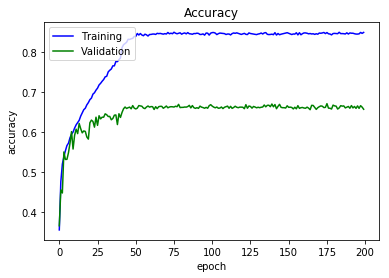

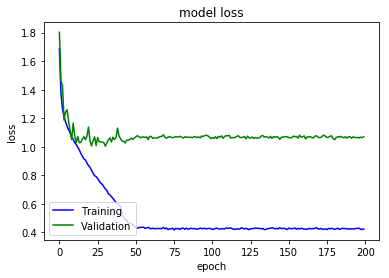

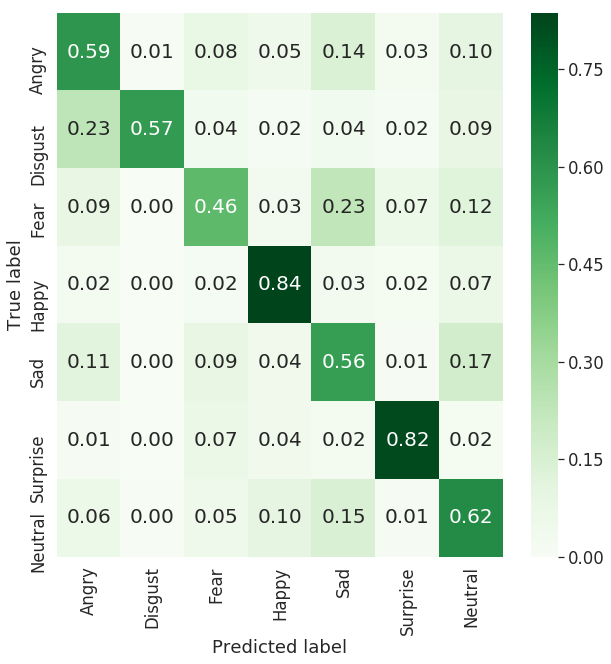

In [43]:
eval_model_public(history_public, cnn_model)

112/112 [==============================] - 35s 313ms/step
Evaluation loss: 1.0124013423919678
Evaluation accuracy: 0.6244078874588013


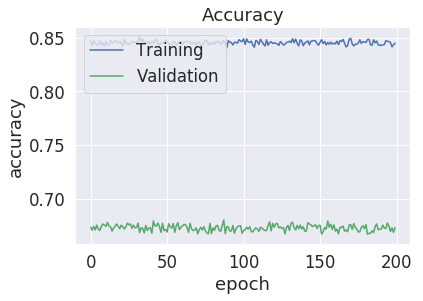

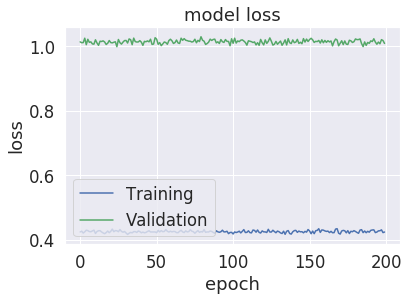

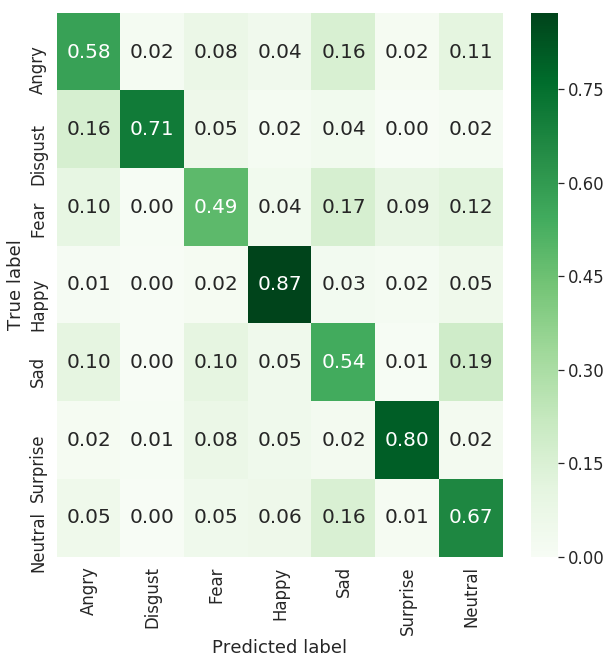

In [44]:
eval_model_private(history_private, cnn_model)

112/112 [==============================] - 3s 31ms/step
Evaluation loss: 1.41484534740448
Evaluation accuracy: 0.3505154848098755


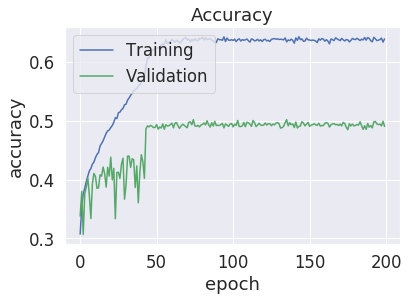

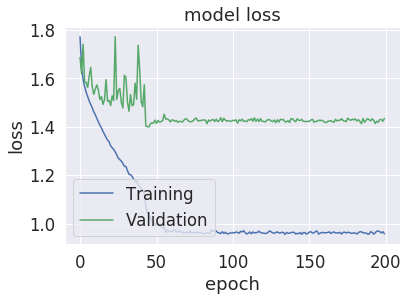

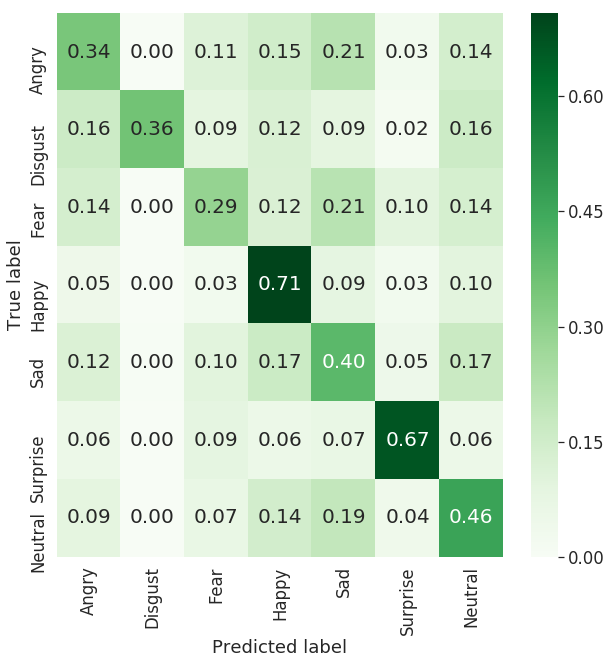

In [45]:
eval_model_public(history_public_nn, nn_model)

112/112 [==============================] - 4s 31ms/step
Evaluation loss: 1.389780044555664
Evaluation accuracy: 0.3502368628978729


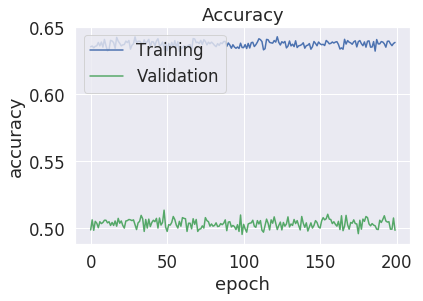

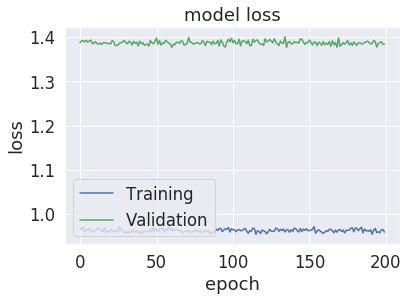

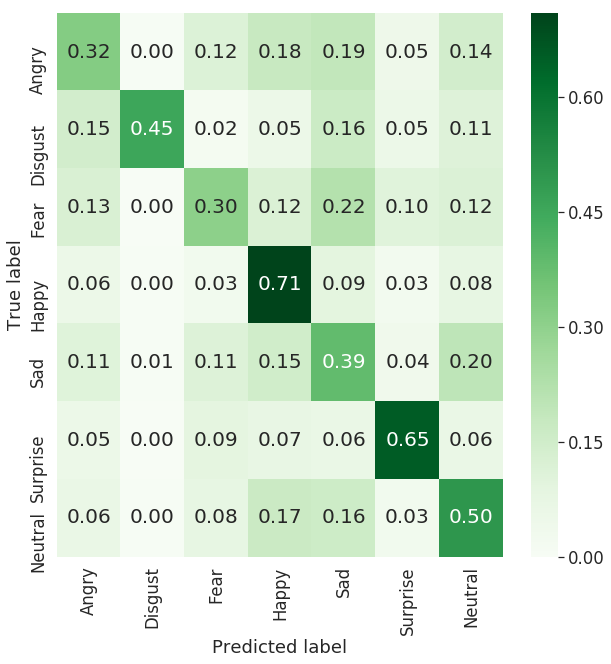

In [46]:
eval_model_private(history_private_nn, nn_model)